# Mathematical Foundations of Deep Neural Network
## Homework 2
### 2017-11362 박건도

In [1]:
# Setting
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Problem 1:** *Logistic regression via SGD.* Use SGD to solve the logistic regression optimization problem

$$\underset{\theta\in\mathbb{R}^{p}}{\text{minimize}}\quad \frac{1}{N}\sum_{i=1}^{N}\log{(1 + \exp{(-Y_i X_i^{\top}\theta)})},$$

where $X_1 , \ldots, X_N \in \mathbb{R}^p$, and $Y_1 , \ldots, Y_N \in \{-1, 1\}$. Use the data

In [2]:
N, p = 30, 20
np.random.seed(0)
X = np.random.randn(N, p)
Y = 2*np.random.randint(2, size = N) - 1

where $X_1^{\top},\ldots,X_N^{\top}$ are the rows of $X$.

---
**Solution**

$$g(\theta):= \nabla_\theta \log(1+\exp(-Y_i X_i^{\top}\theta)) = \frac{1-Y_i\exp(-Y_i X_i^{\top}\theta)X_i}{1 +\exp(-Y_i X_i^{\top}\theta)}$$

$$ \theta^{(k+1)} = \theta^{(k)} - \alpha g(\theta^{(k)})$$

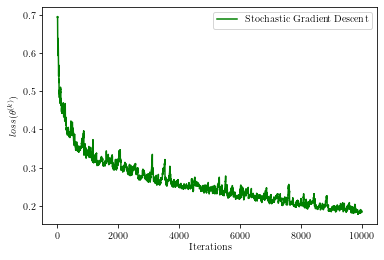

In [3]:
def loss_LR(theta, X=X, Y=Y):
    return np.mean(np.log(1 + np.exp(- Y * np.sum(X * theta, axis=1))))

def g_LR(theta, ind, X=X, Y=Y):
    Xi, Yi = X[ind,:], Y[ind]
    expo = np.exp(-Yi * np.dot(Xi, theta))
    return - Yi * expo * Xi / (1 + expo)

theta = np.zeros(p) # initial value of theta = 0
alpha = 0.05 # roughly the best value

K = 10000
f_val = []
for _ in range(K):
    ind = np.random.randint(N)
    theta -= alpha * g_LR(theta, ind)
    f_val.append(loss_LR(theta))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(list(range(K)),f_val, color = "green", label = "Stochastic Gradient Descent")
plt.xlabel('Iterations')
plt.ylabel(r'$loss(\theta^{(k)})$')
plt.legend()
plt.show()

<hr style="border:2px solid gray"> </hr>

**Problem 2:** *SVM via SGD.* Use SGD to solve the non-differentiable SVM optimization problem

$$\underset{\theta\in\mathbb{R}^{p}}{\text{minimize}}\quad \frac{1}{N}\sum_{i=1}^{N} \max\{0, 1-Y_i X_i^{\top}\theta\} + \lambda \lVert\theta\rVert^2,$$

where $X_1 , \ldots, X_N \in \mathbb{R}^p$, and $Y_1 , \ldots, Y_N \in \{-1, 1\}$, and $\lambda = 0.1$. Use the data of Problem 1. Empirically, does the SGD ever encounter a point of non-differentiability?

---
**Solution**

$$
g(\theta):= \nabla_\theta [ \max\{0,1-Y_i X_i^{\top}\theta\} + \lambda \lVert\theta\rVert^2] =
\begin{cases}
-Y_i X_i + 2 \lambda \theta, & \text{if } 1 - Y_i X_i^{\top}\theta > 0 \\
2\lambda\theta, & \text{otherwise}
\end{cases}
$$

$$ \theta^{(k+1)} = \theta^{(k)} - \alpha g(\theta^{(k)})$$

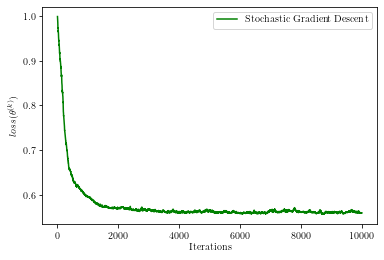

In [4]:
lam = 0.1

def loss_SVM(theta, X=X, Y=Y, lam=lam):
    return np.mean(np.maximum(0, 1 - Y * np.sum(X * theta, axis=1))) + lam * theta @ theta

def g_SVM(theta, ind, X=X, Y=Y, lam=lam):
    Xi, Yi = X[ind,:], Y[ind]
    criteria = 1 - Yi * Xi @ theta
    if criteria > 0:
        return -Yi * Xi + 2 * lam * theta
    else:
        if criteria == 0:
            print('SGD encounter a point of non-differentiability!') # check for non-diff point
        return 2 * lam * theta

theta = np.zeros(p) # initial value of theta = 0
alpha = 0.002 # roughly the best value

K = 10000
f_val = []
for _ in range(K):
    ind = np.random.randint(N)
    theta -= alpha * g_SVM(theta, ind)
    f_val.append(loss_SVM(theta))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(list(range(K)),f_val, color = "green", label = "Stochastic Gradient Descent")
plt.xlabel('Iterations')
plt.ylabel(r'$loss(\theta^{(k)})$')
plt.legend()
plt.show()

SGD does not encounter a point of non-differentiability.

<hr style="border:2px solid gray"> </hr>

**Problem 3:** Consider the data generated by the Python code

In [5]:
N = 30
np.random.seed(0)
X = np.random.randn(2, N)
y = np.sign(X[0,:] ** 2 + X[1,:]**2 - 0.7)
theta = 0.5
c, s = np.cos(theta), np.sin(theta)
X = np.array([[c, -s], [s, c]]) @ X
X = X + np.array([[1], [1]])

Observe (by plotting) that the data is not linearly separable. Consider the transformation

$$ \phi \left( \begin{bmatrix}u\\v\end{bmatrix}\right) = \begin{bmatrix}1\\u\\u^2\\v\\v^2\end{bmatrix}$$

Using the logistic regression or SVM, show that the data $\phi(X_1), \ldots, \phi(X_N)\in\mathbb{R}^5$ with labels $Y_1,\ldots,Y_N\in\{-1,+1\}$ is linearly separable. Visualize in $\mathbb{R}^2$ the data and the decision boundary.

---
**Solution**

Scatter plot of X (X is not linearly seperable).

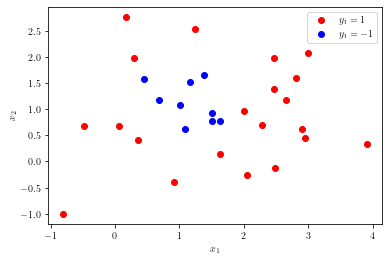

In [6]:
ind1, ind2 = (y == 1), (y == -1)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.scatter(X[0,ind1], X[1,ind1], color="red", label = r"$y_i = 1$")
plt.scatter(X[0,ind2], X[1,ind2], color="blue", label = r"$y_i = -1$")
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.show()

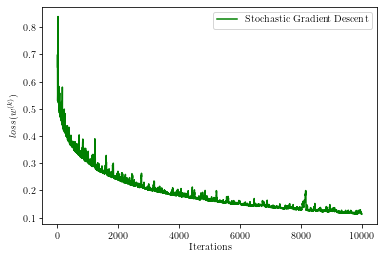

In [7]:
phiX = np.concatenate((np.ones(N), X[0,:], X[0,:]**2, X[1,:], X[1,:]**2)).reshape(5, N).T
w = np.zeros(5) # initial value of theta = 0
alpha = 0.05 # roughly the best value

K = 10000
f_val = []
for _ in range(K):
    ind = np.random.randint(N)
    w -= alpha * g_LR(w, ind, X=phiX, Y=y)
    f_val.append(loss_LR(w, X=phiX, Y=y))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(list(range(K)),f_val, color = "green", label = "Stochastic Gradient Descent")
plt.xlabel('Iterations')
plt.ylabel(r'$loss(w^{(k)})$')
plt.legend()
plt.show()

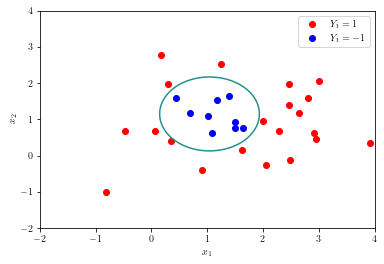

In [8]:
xx, yy = np.meshgrid(np.linspace(-2, 4, 1024), np.linspace(-2, 4, 1024))
Z = w[0] + (w[1] * xx + w[2] * xx**2) + (w[3] * yy + w[4] * yy ** 2)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.scatter(X[0,ind1], X[1,ind1], color="red", label = r"$Y_i = 1$")
plt.scatter(X[0,ind2], X[1,ind2], color="blue", label = r"$Y_i = -1$")
plt.contour(xx, yy, Z, 0)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.show()

<hr style="border:2px solid gray"> </hr>

**Problem 4:** *Nonnegativity of KL-divergence.* Show that

$$ D_{KL}(p\Vert q) \ge 0$$

for any probability mass functions $p, q \in \mathbb{R}^n$.

---
**Solution**

Claim: $-\log x \ge -x + 1 \quad {}^\forall x \ge 0 \qquad\qquad\qquad (1)$

Let $f(x) = -\log x + x - 1$. Then,

$f'(x) = -\frac{1}{x}+1 = 0 \iff x=1$

$f(1) = 0,\ \lim_{x \to \infty} f(x) = \lim_{x \to 0+} f(x) = \infty$.

$\therefore f(x) \ge 0 \quad \Box$.

Let $X \sim p$ be a random variable. Then,

$$
\begin{aligned}
D_{KL}(p\Vert q) &= \sum_{i=1}^n p_i \log\left(\frac{p_i}{q_i}\right)\\
&=\mathbb{E}_p\left[\log\left(\frac{p_X}{q_X}\right)\right] \\
&=\mathbb{E}_p\left[-\log\left(\frac{q_X}{p_X}\right)\right] \\
&\ge\mathbb{E}_p\left[-\frac{q_X}{p_X}+1\right] \quad (\because (1))\\
&= 1 - \sum_{i=1}^n p_i \frac{q_i}{p_i} \\
&= 0 \quad (\because \Sigma q_i = 1)
\end{aligned}
$$


<hr style="border:2px solid gray"> </hr>

**Problem 5:** *Positivity of KL-divergence.* Show that

$$ D_{KL}(p\Vert q) > 0$$

for any probability mass functions $p, q \in \mathbb{R}^n$ such that $p \ne q$.

---
**Solution**

From the above claim, equality holds where $-\log x = -x + 1$, which means $x=1$.

Therefore, $D_{KL}(p\Vert q) = 0$ where $\frac{q_X}{p_X} = 1$, which means $p = q$.

<hr style="border:2px solid gray"> </hr>

**Problem 6:** *Differentiating 2-layer neural networks.* Consider the 2-layer neural network

$$
f_\theta(x) = u^{\top}\sigma(ax+b) = \sum_{j=1}^p u_j\sigma(a_jx+b_j),$$

where $a, b, u \in \mathbb{R}^p$ and $\theta = (a_1 , \ldots,a_p,b_1,\ldots,b_p,u_1,\ldots,u_p)\in\mathbb{R}^{3p}$. Assume the univariate function $\sigma:\mathbb{R}\to\mathbb{R}$ is differentiable. The notation $\sigma(ax+b)$ means $\sigma$ is applied elementwise to the vector in $\mathbb{R}^p$. Show that

$$
\begin{aligned}
\nabla_uf_\theta(x) &= \sigma(ax+b) \\
\nabla_bf_\theta(x) &= \sigma'(ax+b) \odot u = \text{diag}(\sigma'(ax+b))u \\
\nabla_af_\theta(x) &= (\sigma'(ax+b)\odot u)x = \text{diag}(\sigma'(ax+b))ux
\end{aligned}
$$

where $\sigma'(ax+b)$ means the univariate function $\sigma'$ is applied elementwise to the vector $ax+b$, $\odot$ denotes the element-wise product, and $\text{diag}(\cdot)$ denotes the diagonal matrix with the diagonal elements equal to the elements of the input vector.

---
**Solution**

$\frac{\partial}{\partial u_j}f_\theta(x)=\frac{\partial}{\partial u_j} \sum_{j=1}^p u_j \sigma(a_jx+b_j)= \sigma(a_jx+b_j)$

$\Rightarrow \nabla_uf_\theta(x) = \sigma(ax+b)$ ($\because$ $j$th row of $ax$ is $a_jx$)

$\frac{\partial}{\partial b_j} f_\theta(x) = \frac{\partial}{\partial b_j} \sum_{j=1}^p u_j \sigma(a_jx+b_j)= u_j\sigma'(a_jx+b_j)$

$\Rightarrow \nabla_bf_\theta(x) = \sigma'(ax+b)\odot u$

$\frac{\partial}{\partial a_j} f_\theta(x) = \frac{\partial}{\partial a_j} \sum_{j=1}^p u_j \sigma(a_jx+b_j)= u_j\sigma'(a_jx+b_j)x$


$\Rightarrow \nabla_af_\theta(x) = (\sigma'(ax+b)\odot u)x$

<hr style="border:2px solid gray"> </hr>

**Problem 7:** *SGD with 2-layer neural networks.*

---
**Solution**

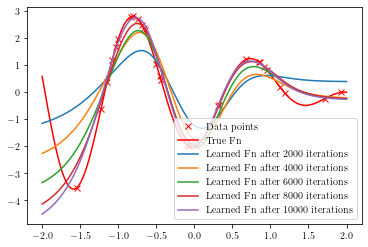

In [9]:
# code from twolayerSGD.py

def f_true(x) :
    return (x-2)*np.cos(x*4)

def sigmoid(x) :
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x) :
    return sigmoid(x) * (1 - sigmoid(x))

K = 10000
alpha = 0.007
N, p = 30, 50
np.random.seed(0)
a0 = np.random.normal(loc = 0.0, scale = 4.0, size = p)
b0 = np.random.normal(loc = 0.0, scale = 4.0, size = p)
u0 = np.random.normal(loc = 0, scale = 0.05, size = p)
theta = np.concatenate((a0,b0,u0))


X = np.random.normal(loc = 0.0, scale = 1.0, size = N)
Y = f_true(X)

def f_th(theta, x) :
    return np.sum(theta[2*p : 3*p] * sigmoid(theta[0 : p] * np.reshape(x,(-1,1)) + theta[p : 2*p]), axis=1)

def diff_f_th(theta, x) :
    #####     implemented part     #####
    a, b, u = theta[ : p], theta[p : 2 * p], theta[2 * p :]
    nabla_u = sigmoid(a * x + b)
    nabla_b = sigmoid_prime(a * x + b) * u
    nabla_a = x * sigmoid_prime(a * x + b) * u
    return np.concatenate((nabla_a, nabla_b, nabla_u))
    ####################################
    
xx = np.linspace(-2,2,1024)
plt.plot(X,f_true(X),'rx',label='Data points')
plt.plot(xx,f_true(xx),'r',label='True Fn')

for k in range(K) :
    #####     implemented part     #####
    ind = np.random.randint(N)
    Xi, Yi = X[ind], Y[ind]
    theta -= alpha * diff_f_th(theta, Xi) * (f_th(theta, Xi) - Yi)
    ####################################
    if (k+1)%2000 == 0 :
        plt.plot(xx,f_th(theta, xx),label=f'Learned Fn after {k+1} iterations')

plt.legend()
plt.show()